<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/IRC017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/refs/heads/main/creditcard_split.zip
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/refs/heads/main/creditcard_split.z01

--2025-03-18 15:55:15--  https://raw.githubusercontent.com/wannasmile/colab_code_note/refs/heads/main/creditcard_split.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19719960 (19M) [application/zip]
Saving to: ‘creditcard_split.zip’

creditcard_split.zi 100%[===================>]  18.81M  96.8MB/s    in 0.2s    

2025-03-18 15:55:15 (96.8 MB/s) - ‘creditcard_split.zip’ saved [19719960/19719960]

--2025-03-18 15:55:15--  https://raw.githubusercontent.com/wannasmile/colab_code_note/refs/heads/main/creditcard_split.z01
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sen

In [2]:
!apt-get install zip unzip
!zip -s 0 creditcard_split.zip --out creditcard_merged.zip
!unzip creditcard_merged.zip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
zip is already the newest version (3.0-12build2).
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
 copying: creditcard.csv
Archive:  creditcard_merged.zip
  inflating: creditcard.csv          


In [3]:
#!wget https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/refs/heads/master/creditcard.csv

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.Class.value_counts()

,count
Class,
0,284315
1,492


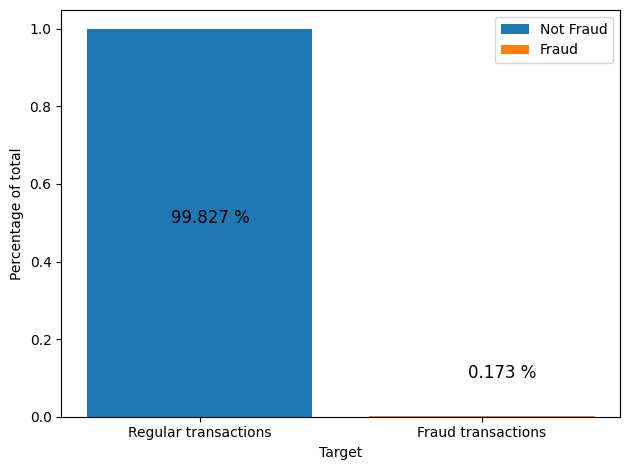

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

ratio_ones = df.Class.mean()
ratio_zeros = (len(df) - df.Class.sum())/len(df)

plt.bar('Regular transactions', height=ratio_zeros, label='Not Fraud')
plt.bar('Fraud transactions', height=ratio_ones, label='Fraud')
plt.xlabel("Target")
plt.ylabel('Percentage of total')
plt.text(-0.10, 0.5, "{0:.3f} %".format(ratio_zeros*100), fontsize=12)
plt.text(0.95, 0.1, "{0:.3f} %".format(ratio_ones*100), fontsize=12)
plt.legend()
plt.tight_layout()

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


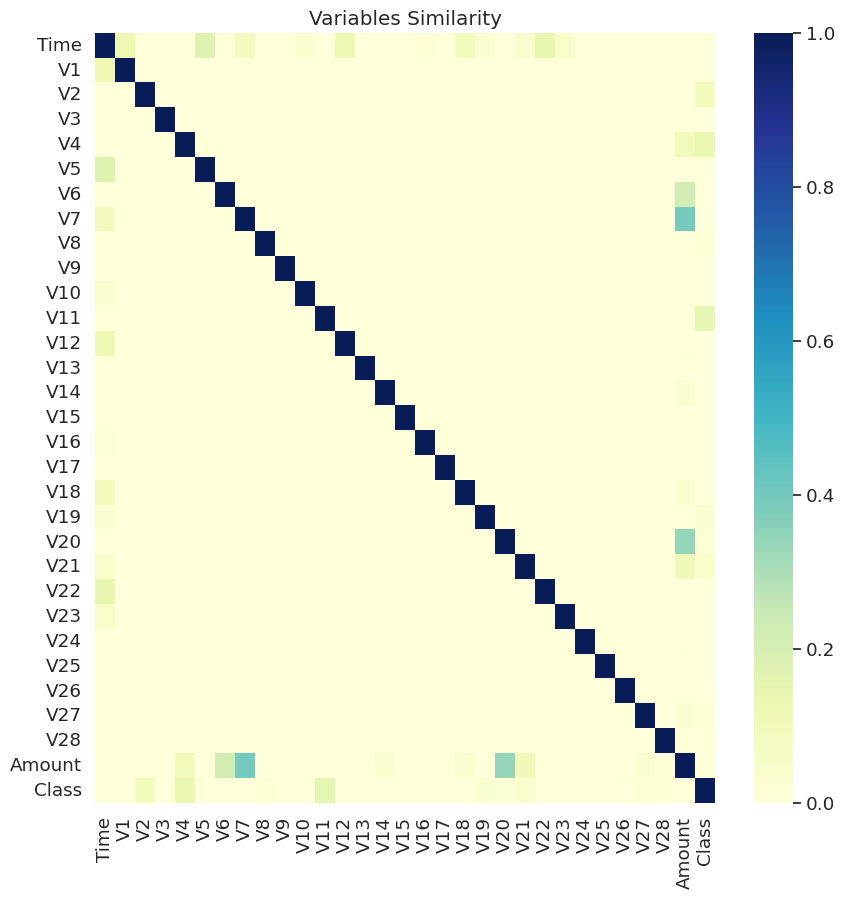

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,10))
def plot_similarity(labels, features, rotation):
    corr = features.corr()
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlGnBu")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Variables Similarity")

plot_similarity(df.columns, df, 90)

<Axes: >

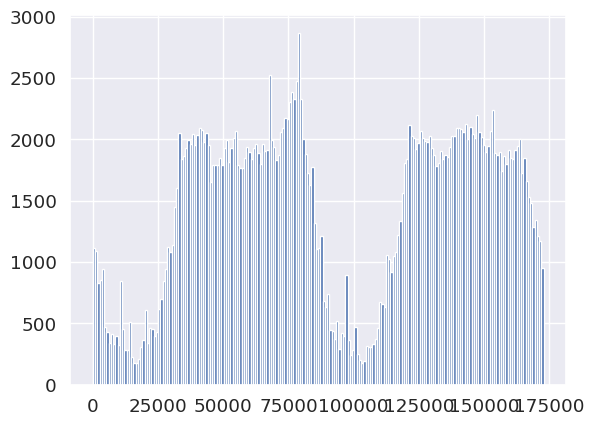

In [11]:
df.Time.hist(bins=200)

<Axes: >

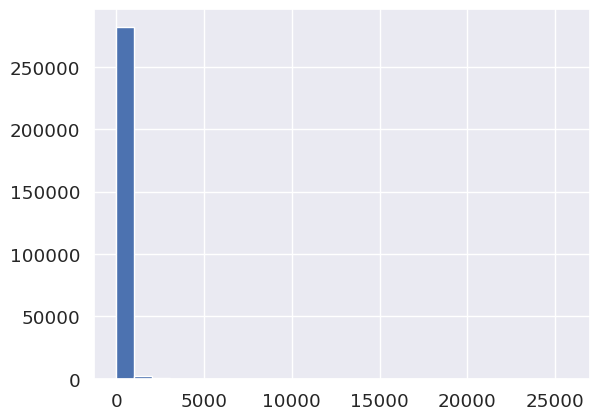

In [12]:
df.Amount.hist(bins=25)

正如我们在这里看到的，金额变量存在异常值。可能欺诈交易与更高的交易金额相关。让我们用一个简单的交叉表来验证这个假设是否成立。

Amount和Class的交叉表

In [13]:
transaction_amount_threshold = 1000
amount_flag = ((df.Amount > transaction_amount_threshold).astype(int))
amount_flag.value_counts()

,count
Amount,
0,281867
1,2940


In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(amount_flag, df.Class)

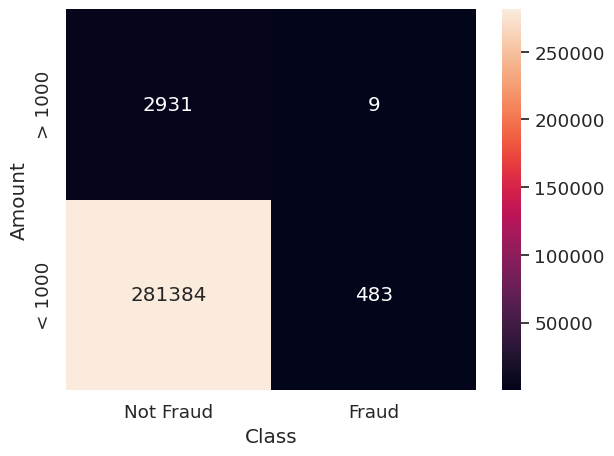

In [15]:
sns.heatmap(cm, annot=True, yticklabels=['< ' + str(transaction_amount_threshold), '> ' + str(transaction_amount_threshold)],
                xticklabels=['Not Fraud', 'Fraud'],
                fmt='g')
yl = plt.ylabel("Amount")
xl = plt.xlabel("Class")
plt.ylim([0,2])
plt.tight_layout()

从上述分析中，我们看到，金额超过1000美元的交易中，有0.3% (9/2940) 是欺诈交易，而金额低于1000美元的交易中，这一比例为0.17% (483/281867)。

In [16]:
!pip install xverse

特征选择

In [17]:
df.drop(['Time'], axis=1, inplace=True)

In [18]:
from xverse.feature_subset import SplitXY  # 导入 xverse 库中的 SplitXY 类，用于分割特征和目标变量

def splitXY(df, target_column):
    """
    将 DataFrame 分割为特征矩阵 X 和目标变量 y。

    参数：
        df (pandas.DataFrame): 输入的 DataFrame。
        target_column (str): 目标变量的列名。

    返回：
        tuple: 包含特征矩阵 X (numpy.ndarray) 和目标变量 y (numpy.ndarray) 的元组。
    """
    clf = SplitXY([target_column])  # 创建 SplitXY 类的实例，指定目标变量列名
    X, y = clf.fit_transform(df)  # 使用 fit_transform 方法将 DataFrame 分割为 X 和 y，返回 numpy 数组
    return X, y  # 返回特征矩阵 X 和目标变量 y

def make_train_test_split(X=None, y=None, test_size=0.3, random_state=1234):
    """
    将特征矩阵 X 和目标变量 y 分割为训练集和测试集。

    参数：
        X (numpy.ndarray, optional): 特征矩阵，默认为 None。
        y (numpy.ndarray, optional): 目标变量，默认为 None。
        test_size (float, optional): 测试集大小，默认为 0.3。
        random_state (int, optional): 随机种子，用于控制数据集分割的随机性，默认为 1234。

    返回：
        tuple: 包含 X_train, X_test, y_train, y_test 的元组。
    """
    from sklearn.model_selection import train_test_split  # 导入 sklearn 库中的 train_test_split 函数
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)  # 使用 train_test_split 函数分割数据集
    return X_train, X_test, y_train, y_test  # 返回训练集和测试集的特征矩阵和目标变量

X, y = splitXY(df, 'Class')  # 使用 splitXY 函数将 DataFrame df 分割为特征矩阵 X 和目标变量 y，目标变量为 'Class' 列
X_train, X_test, y_train, y_test = make_train_test_split(X=X, y=y, test_size=0.3, random_state=1234)  # 使用 make_train_test_split 函数将 X 和 y 分割为训练集和测试集，测试集大小为 0.3，随机种子为 1234

In [19]:
print(X_train.shape)
print(y_train.shape)
print(np.sum(y_train))
print(np.sum(y_test))

(199364, 29)
(199364,)
351
141


In [20]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

缺失值检验

In [21]:
X_train.isnull().sum()

,0
Amount,0
V1,0
V10,0
V11,0
V12,0
V13,0
V14,0
V15,0
V16,0
V17,0


检查单一值（即各列的基数）

In [22]:
X_train.nunique()

,0
Amount,27420
V1,194224
V10,194219
V11,194219
V12,194223
V13,194222
V14,194220
V15,194222
V16,194219
V17,194216


In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd

# 示例数据（如果你的数据已经加载，则删除此部分）
np.random.seed(42)  # 设置随机种子以保证结果可复现
num_samples = 10000  # 设置样本数量
num_features = 29  # 设置特征数量
data = pd.DataFrame(np.random.randn(num_samples, num_features))  # 创建包含随机数据的 DataFrame，维度：(num_samples, num_features)
data['Class'] = np.random.choice([0, 1], size=num_samples, p=[0.998, 0.002])  # 添加 'Class' 列，其中 1 代表正样本，0 代表负样本，正负样本比例为 0.2%：99.8%
data['Time'] = np.random.rand(num_samples)  # 添加 'Time' 列，包含随机时间数据

# 删除 'Time' 列
data = data.drop('Time', axis=1)  # 删除 'Time' 列，因为该列不影响后续模型训练

# 分离正样本和负样本
X_ones = data[data['Class'] == 1].drop('Class', axis=1)  # 从数据中提取正样本的特征，并删除 'Class' 列
X_zeros = data[data['Class'] == 0].drop('Class', axis=1)  # 从数据中提取负样本的特征，并删除 'Class' 列

# 定义特征数的全局变量
NUM_FEATURES = X_ones.shape[1]  # 获取正样本的特征数量

# 生成器模型
class Generator(tf.keras.Model):
    def __init__(self, num_features, alpha=0.01):
        super().__init__()  # 调用父类的构造函数
        self.dense1 = tf.keras.layers.Dense(units=128)  # 定义第一个全连接层，输入维度：(None, 100)，输出维度：(None, 128)
        self.dense2 = tf.keras.layers.Dense(units=64)  # 定义第二个全连接层，输入维度：(None, 128)，输出维度：(None, 64)
        self.output_layer = tf.keras.layers.Dense(units=num_features, activation='tanh')  # 定义输出层，输入维度：(None, 64)，输出维度：(None, num_features)
        self.alpha = alpha  # 设置 leaky ReLU 的 alpha 参数

    def call(self, inputs):
        hidden1 = tf.nn.leaky_relu(self.dense1(inputs), alpha=self.alpha)  # 第一个全连接层的 leaky ReLU 激活
        hidden2 = tf.nn.leaky_relu(self.dense2(hidden1), alpha=self.alpha)  # 第二个全连接层的 leaky ReLU 激活
        output = self.output_layer(hidden2)  # 输出层
        return output

# 判别器模型
class Discriminator(tf.keras.Model):
    def __init__(self, alpha=0.01):
        super().__init__()  # 调用父类的构造函数
        self.dense1 = tf.keras.layers.Dense(units=128)  # 定义第一个全连接层，输入维度：(None, num_features)，输出维度：(None, 128)
        self.dense2 = tf.keras.layers.Dense(units=128)  # 定义第二个全连接层，输入维度：(None, 128)，输出维度：(None, 128)
        self.logits_layer = tf.keras.layers.Dense(units=1)  # 定义 logits 输出层，输入维度：(None, 128)，输出维度：(None, 1)
        self.output_layer = tf.keras.layers.Activation('sigmoid')  # 定义 sigmoid 激活层
        self.alpha = alpha  # 设置 leaky ReLU 的 alpha 参数

    def call(self, inputs):
        hidden1 = tf.nn.leaky_relu(self.dense1(inputs), alpha=self.alpha)  # 第一个全连接层的 leaky ReLU 激活
        hidden2 = tf.nn.leaky_relu(self.dense2(hidden1), alpha=self.alpha)  # 第二个全连接层的 leaky ReLU 激活
        logits = self.logits_layer(hidden2)  # logits 输出
        output = self.output_layer(logits)  # sigmoid 激活输出
        return output, logits

# 定义输入
real_data_input = tf.keras.Input(shape=(NUM_FEATURES,))  # 定义真实数据输入，形状为 (None, 特征数量)
z_input = tf.keras.Input(shape=(100,))  # 定义噪声输入，形状为 (None, 100)

# 创建模型实例
generator = Generator(NUM_FEATURES)  # 创建生成器模型实例
discriminator = Discriminator()  # 创建判别器模型实例

# 打印模型结构
generator.build(input_shape=(None, 100))  # 构建生成器模型
discriminator.build(input_shape=(None, NUM_FEATURES))  # 构建判别器模型
generator.summary()  # 打印生成器模型结构
discriminator.summary()  # 打印判别器模型结构

# 使用模型
generated_data = generator(z_input)  # 使用生成器生成假数据
discriminator_output_real, D_logits_real = discriminator(real_data_input)  # 使用判别器判别真实数据
discriminator_output_fake, D_logits_fake = discriminator(generated_data)  # 使用判别器判别假数据

# LOSS
def loss_func(logits_in, labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in, labels=labels_in))  # 定义交叉熵损失函数

learning_rate = 0.001  # 设置学习率
d_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)  # 创建判别器优化器
g_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)  # 创建生成器优化器

def next_batch(num, data):
    idx = np.arange(0, len(data))  # 创建索引数组
    np.random.shuffle(idx)  # 打乱索引数组
    idx = idx[:num]  # 获取指定数量的索引
    data_shuffle = data.iloc[idx]  # 根据索引获取数据
    return np.asarray(data_shuffle)  # 将数据转换为 NumPy 数组

batch_size = 10  # 设置批次大小
epochs = 300  # 设置训练轮数
samples = []  # 用于存储生成的样本
no_of_samples_to_generate = len(X_zeros) - len(X_ones)  # 计算需要生成的样本数量

for epoch in range(epochs):
    num_batches = len(X_ones) // batch_size  # 计算批次数量
    for i in range(num_batches):
        batch_X = next_batch(batch_size, X_ones)  # 获取真实数据批次
        batch_z = np.random.uniform(-1, 1, size=(batch_size, 100))  # 生成噪声批次

        with tf.GradientTape() as d_tape:
            _, D_logits_real_tensor = discriminator(batch_X)  # 获取真实数据的判别器输出
            generated_data_tensor = generator(batch_z)  # 生成假数据
            _, D_logits_fake_tensor = discriminator(generated_data_tensor)  # 获取假数据的判别器输出
            d_loss = loss_func(D_logits_real_tensor, tf.ones_like(D_logits_real_tensor) * 0.9) + loss_func(D_logits_fake_tensor, tf.zeros_like(D_logits_real_tensor))  # 计算判别器损失
        d_gradients = d_tape.gradient(d_loss, discriminator.trainable_variables)  # 计算判别器梯度
        d_optimizer.apply_gradients(zip(d_gradients, discriminator.trainable_variables))  # 更新判别器参数

        with tf.GradientTape() as g_tape:
            generated_data_tensor = generator(batch_z)  # 生成假数据
            _, D_logits_fake_tensor = discriminator(generated_data_tensor)  # 获取假数据的判别器输出
            g_loss = loss_func(D_logits_fake_tensor, tf.ones_like(D_logits_fake_tensor))  # 计算生成器损失
        g_gradients = g_tape.gradient(g_loss, generator.trainable_variables)  # 计算生成器梯度
        g_optimizer.apply_gradients(zip(g_gradients, generator.trainable_variables))  # 更新生成器参数

    if epoch % 100 == 0:
        print("ON Epoch {}".format(epoch))  # 每 100 轮打印一次训练轮数

sample_z = np.random.uniform(-1, 1, size=(no_of_samples_to_generate, 100))  # 生成用于生成样本的噪声，维度：(no_of_samples_to_generate, 100)
generated_positive_samples = generator(sample_z).numpy()  # 生成假的正样本，维度：(no_of_samples_to_generate, num_features)
samples.append(generated_positive_samples)  # 将生成的样本添加到列表中

generated_positive_samples_df = pd.DataFrame(generated_positive_samples, columns=X_ones.columns)  # 将生成的样本转换为 DataFrame，并设置列名
generated_positive_samples_df['Class'] = 1  # 添加 'Class' 列，并设置为 1，表示正样本

augmented_data = pd.concat([X_ones, generated_positive_samples_df.drop('Class', axis=1)])  # 将原始正样本和生成的正样本合并
augmented_data['Class'] = pd.concat([pd.Series(1, index=X_ones.index), pd.Series(1, index=generated_positive_samples_df.index)])  # 添加 'Class' 列，并设置为 1

final_data = pd.concat([augmented_data, X_zeros])  # 将合并后的正样本和负样本合并
final_data = final_data.sample(frac=1).reset_index(drop=True)  # 打乱数据并重置索引

print("Original positive samples:", len(X_ones))  # 打印原始正样本数量
print("Generated positive samples:", len(generated_positive_samples_df))  # 打印生成的正样本数量
print("Final dataset shape:", final_data.shape)  # 打印最终数据集的形状
print("Positive samples count in final dataset:", len(final_data[final_data['Class'] == 1]))  # 打印最终数据集中正样本的数量

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

ON Epoch 0
ON Epoch 100
ON Epoch 200
Original positive samples: 16
Generated positive samples: 9968
Final dataset shape: (19968, 30)
Positive samples count in final dataset: 9984


In [25]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [26]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# 分离特征和目标变量
X = df.drop('Class', axis=1)
y = df['Class']

# 创建 RandomUnderSampler 实例，设置 sampling_strategy 参数
# 将 majority 类 (Class 0) 降采样到 10000 个
rus = RandomUnderSampler(sampling_strategy={0: 10000}, random_state=42)

# 对数据进行降采样
X_resampled, y_resampled = rus.fit_resample(X, y)

# 将降采样后的数据合并成新的 DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                         pd.DataFrame(y_resampled, columns=['Class'])], axis=1)

# 输出新的 DataFrame
print(resampled_df)

              V1        V2        V3        V4        V5        V6        V7  \
138028  1.314539  0.590643 -0.666593  0.716564  0.301978 -1.125467  0.388881   
63099  -0.798672  1.185093  0.904547  0.694584  0.219041 -0.319295  0.495236   
73411  -0.391128 -0.245540  1.122074 -1.308725 -0.639891  0.008678 -0.701304   
164247 -0.060302  1.065093 -0.987421 -0.029567  0.176376 -1.348539  0.775644   
148999  1.848433  0.373364  0.269272  3.866438  0.088062  0.970447 -0.721945   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10  .

In [27]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = resampled_df.copy()

# 分割训练集和测试集
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 从训练集中分离正样本和负样本
X_ones = train_data[train_data['Class'] == 1].drop('Class', axis=1)
X_zeros = train_data[train_data['Class'] == 0].drop('Class', axis=1)

# 定义特征数的全局变量
NUM_FEATURES = X_ones.shape[1]

# 生成器模型
class Generator(tf.keras.Model):
    def __init__(self, num_features, alpha=0.01):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=128)
        self.dense2 = tf.keras.layers.Dense(units=64)
        self.output_layer = tf.keras.layers.Dense(units=num_features, activation='tanh')
        self.alpha = alpha

    def call(self, inputs):
        hidden1 = tf.nn.leaky_relu(self.dense1(inputs), alpha=self.alpha)
        hidden2 = tf.nn.leaky_relu(self.dense2(hidden1), alpha=self.alpha)
        output = self.output_layer(hidden2)
        return output

# 判别器模型
class Discriminator(tf.keras.Model):
    def __init__(self, alpha=0.01):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=128)
        self.dense2 = tf.keras.layers.Dense(units=128)
        self.logits_layer = tf.keras.layers.Dense(units=1)
        self.output_layer = tf.keras.layers.Activation('sigmoid')
        self.alpha = alpha

    def call(self, inputs):
        hidden1 = tf.nn.leaky_relu(self.dense1(inputs), alpha=self.alpha)
        hidden2 = tf.nn.leaky_relu(self.dense2(hidden1), alpha=self.alpha)
        logits = self.logits_layer(hidden2)
        output = self.output_layer(logits)
        return output, logits

# 定义输入
real_data_input = tf.keras.Input(shape=(NUM_FEATURES,))
z_input = tf.keras.Input(shape=(100,))

# 创建模型实例
generator = Generator(NUM_FEATURES)
discriminator = Discriminator()

# 使用模型
generated_data = generator(z_input)
discriminator_output_real, D_logits_real = discriminator(real_data_input)
discriminator_output_fake, D_logits_fake = discriminator(generated_data)

# LOSS
def loss_func(logits_in, labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in, labels=labels_in))

learning_rate = 0.01
d_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
g_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

def next_batch(num, data):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = data.iloc[idx]
    return np.asarray(data_shuffle)

batch_size = 10
#epochs = 1500
epochs = 300
samples = []
no_of_samples_to_generate = len(X_zeros) - len(X_ones)

for epoch in range(epochs):
    num_batches = len(X_ones) // batch_size
    for i in range(num_batches):
        batch_X = next_batch(batch_size, X_ones)
        batch_z = np.random.uniform(-1, 1, size=(batch_size, 100))

        with tf.GradientTape() as d_tape:
            _, D_logits_real_tensor = discriminator(batch_X)
            generated_data_tensor = generator(batch_z)
            _, D_logits_fake_tensor = discriminator(generated_data_tensor)
            d_loss = loss_func(D_logits_real_tensor, tf.ones_like(D_logits_real_tensor) * 0.9) + loss_func(D_logits_fake_tensor, tf.zeros_like(D_logits_real_tensor))
        d_gradients = d_tape.gradient(d_loss, discriminator.trainable_variables)
        d_optimizer.apply_gradients(zip(d_gradients, discriminator.trainable_variables))

        with tf.GradientTape() as g_tape:
            generated_data_tensor = generator(batch_z)
            _, D_logits_fake_tensor = discriminator(generated_data_tensor)
            g_loss = loss_func(D_logits_fake_tensor, tf.ones_like(D_logits_fake_tensor))
        g_gradients = g_tape.gradient(g_loss, generator.trainable_variables)
        g_optimizer.apply_gradients(zip(g_gradients, generator.trainable_variables))

    if epoch % 100 == 0:
        print("ON Epoch {}".format(epoch))

sample_z = np.random.uniform(-1, 1, size=(no_of_samples_to_generate, 100))
generated_positive_samples = generator(sample_z).numpy()
samples.append(generated_positive_samples)

generated_positive_samples_df = pd.DataFrame(generated_positive_samples, columns=X_ones.columns)
generated_positive_samples_df['Class'] = 1

augmented_data = pd.concat([X_ones, generated_positive_samples_df.drop('Class', axis=1)])
augmented_data['Class'] = pd.concat([pd.Series(1, index=X_ones.index), pd.Series(1, index=generated_positive_samples_df.index)])

X_zeros['Class'] = 0

final_data = pd.concat([augmented_data, X_zeros])
final_data = final_data.sample(frac=1).reset_index(drop=True)

print("Original positive samples:", len(X_ones))
print("Generated positive samples:", len(generated_positive_samples_df))
print("Final dataset shape:", final_data.shape)
print("Positive samples count in final dataset:", len(final_data[final_data['Class'] == 1]))

ON Epoch 0
ON Epoch 100
ON Epoch 200
Original positive samples: 395
Generated positive samples: 7603
Final dataset shape: (15996, 30)
Positive samples count in final dataset: 7998


In [28]:
X_zeros['Class'] = 0
final_data = pd.concat([augmented_data, X_zeros])
final_data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274767,-0.074949,-0.581335,0.003563,-3.129617,0.036601,-0.499372,1.168465,-0.567473,-2.543754,0.784180,...,-0.191524,-0.295463,0.258634,0.362665,-0.364318,-0.530294,-0.069398,-0.036795,150.00,0
174211,0.315677,0.792154,-1.980506,0.166049,2.757871,3.954494,0.249410,-0.094461,-0.726462,0.370339,...,0.913951,0.397564,0.173827,0.772716,-1.150774,0.645484,0.347398,0.256834,49.00,0
108876,-0.778253,0.130171,2.330368,1.743399,-0.602476,0.995023,0.315305,0.375928,0.519821,-0.725877,...,-0.253331,-0.519313,0.220585,0.059610,-0.079110,-0.389913,0.152509,0.133106,126.25,0
88007,-2.242599,0.091694,1.335811,0.234568,1.097002,0.989207,-0.325398,-0.368086,0.275580,-0.093656,...,0.594285,-0.007640,-0.503496,-0.533261,-0.520751,0.270840,-0.005266,-0.658016,10.67,0
279854,-1.196644,1.930087,-3.515438,-1.333896,3.579285,2.453577,0.393479,1.501623,-1.140802,-1.962905,...,0.070668,0.031609,-0.362972,0.529802,0.358193,0.705651,-0.031975,0.087211,0.76,0


In [29]:
final_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,15996.000000,15996.000000,15996.000000,15996.000000,15996.000000,15996.000000,15996.000000,15996.000000,15996.000000,15996.000000,...,15996.000000,15996.000000,15996.000000,15996.000000,15996.000000,15996.000000,15996.000000,15996.000000,15996.000000,15996.000000
mean,-0.585676,0.565274,-0.647536,0.578452,-0.538695,-0.510595,-0.607193,-0.459318,0.421565,0.341209,...,0.490455,-0.474927,-0.476997,-0.479620,0.473223,-0.473613,-0.471152,0.477943,46.481455,0.500000
std,1.871526,1.453555,1.843246,1.340917,1.384016,1.100308,1.639564,1.417218,1.103029,1.507791,...,0.937688,0.748906,0.682955,0.665315,0.637429,0.611507,0.615248,0.558287,160.059708,0.500016
min,-30.515455,-32.494845,-30.558697,-4.790224,-21.665654,-13.450773,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-19.254328,-2.836627,-4.781606,-1.535092,-7.263482,-8.307955,0.000000,0.000000
25%,-1.000000,0.056054,-1.000000,-0.039277,-1.000000,-1.000000,-1.000000,-1.000000,-0.122966,-0.163442,...,-0.035947,-1.000000,-1.000000,-1.000000,-0.015455,-1.000000,-1.000000,0.008150,1.000000,0.000000
50%,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-0.909433,1.000000,1.000000,...,0.751239,-1.000000,-0.539748,-1.000000,0.785044,-0.707220,-0.471485,0.305794,1.000000,0.500000
75%,0.077185,1.000000,0.172196,1.000000,-0.016351,-0.256385,0.061617,0.060473,1.000000,1.000000,...,1.000000,0.052894,-0.000465,0.053357,1.000000,-0.009714,0.010651,1.000000,24.990000,1.000000
max,2.398119,22.057729,3.770236,11.927512,18.621686,8.755152,12.164068,19.587773,7.929051,11.768124,...,27.202839,8.361985,15.626067,3.951679,5.541598,2.859167,9.879903,15.373170,4000.000000,1.000000


Accuracy: 0.9929
Recall: 0.8454
Precision: 1.0000
F1 Score: 0.9162
ROC AUC: 0.9778


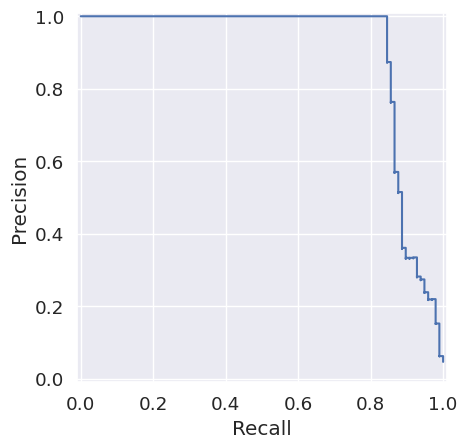

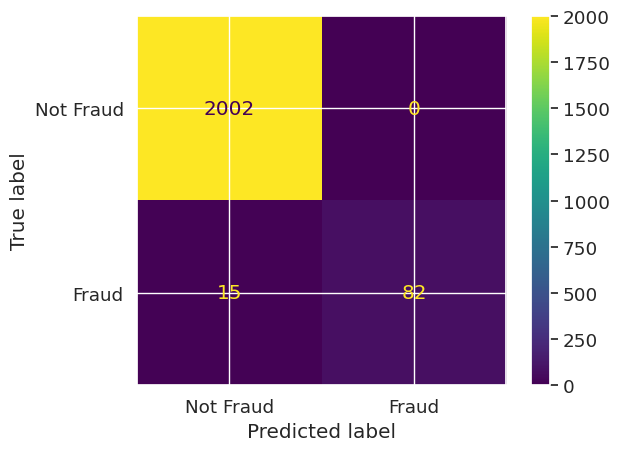

In [30]:
#!pip install xgboost
#!pip install scikit-learn
#!pip install imblearn
import xgboost as xgb  # 导入 XGBoost 库
from sklearn.model_selection import train_test_split  # 导入数据集划分函数
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix  # 导入评估指标
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay  # 导入混淆矩阵和精确率-召回率曲线显示函数
import matplotlib.pyplot as plt  # 导入绘图库


# 1. 准备数据

X_train = final_data.drop('Class', axis=1)  # 从数据中移除 'Class' 列，得到特征矩阵 X
y_train = final_data['Class']  # 获取 'Class' 列作为目标变量 y

X_test = test_data.drop('Class', axis=1)  # 从数据中移除 'Class' 列，得到特征矩阵 X
y_test = test_data['Class']  # 获取 'Class' 列作为目标变量 y

# 2. 训练 XGBoost 模型
model = xgb.XGBClassifier(random_state=42)  # 创建 XGBoost 分类器模型，设置随机种子
model.fit(X_train, y_train)  # 使用训练集训练模型

# 3. 在测试集上进行预测
y_pred = model.predict(X_test)  # 使用模型预测测试集的类别
y_pred_proba = model.predict_proba(X_test)[:, 1]  # 获取测试集属于类别 1 的概率

# 4. 评估模型性能
accuracy = accuracy_score(y_test, y_pred)  # 计算准确率
recall = recall_score(y_test, y_pred)  # 计算召回率
precision = precision_score(y_test, y_pred)  # 计算精确率
f1 = f1_score(y_test, y_pred)  # 计算 F1 分数
roc_auc = roc_auc_score(y_test, y_pred_proba)  # 计算 ROC AUC 值

print(f"Accuracy: {accuracy:.4f}")  # 打印准确率
print(f"Recall: {recall:.4f}")  # 打印召回率
print(f"Precision: {precision:.4f}")  # 打印精确率
print(f"F1 Score: {f1:.4f}")  # 打印 F1 分数
print(f"ROC AUC: {roc_auc:.4f}")  # 打印 ROC AUC 值

# 5. 精确率-召回率曲线
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)  # 计算精确率和召回率
disp = PrecisionRecallDisplay(precision=precision, recall=recall)  # 创建精确率-召回率曲线显示对象
disp.plot()  # 绘制精确率-召回率曲线
plt.show()  # 显示图像

# 6. 混淆矩阵
cm = confusion_matrix(y_test, y_pred)  # 计算混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])  # 创建混淆矩阵显示对象，设置标签
disp.plot()  # 绘制混淆矩阵
plt.show()  # 显示图像

Accuracy: 0.9924
Recall: 0.8351
Precision: 1.0000
F1 Score: 0.9101
ROC AUC: 0.9724


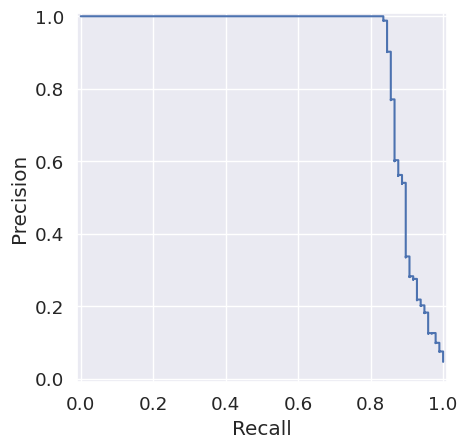

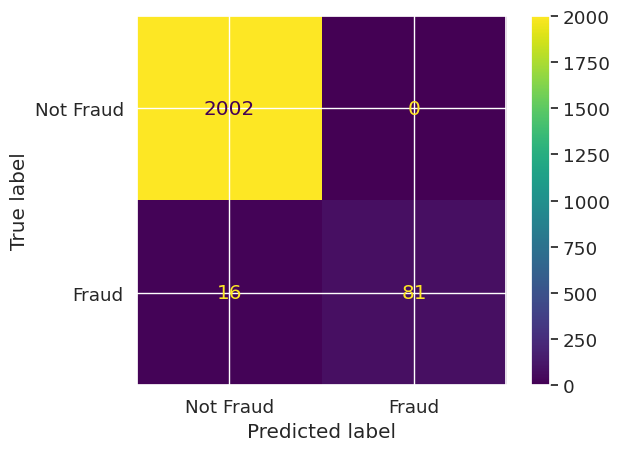

In [31]:
#!pip install xgboost
#!pip install scikit-learn
#!pip install imblearn
import xgboost as xgb  # 导入 XGBoost 库
from sklearn.model_selection import train_test_split  # 导入数据集划分函数
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix  # 导入评估指标
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay  # 导入混淆矩阵和精确率-召回率曲线显示函数
import matplotlib.pyplot as plt  # 导入绘图库

# 假设 resampled_df 已经被加载

# 1. 准备数据
data = resampled_df.copy()  # 复制 resampled_df 数据，避免修改原始数据

X = data.drop('Class', axis=1)  # 从数据中移除 'Class' 列，得到特征矩阵 X
y = data['Class']  # 获取 'Class' 列作为目标变量 y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 将数据集划分为训练集和测试集，测试集占比 20%，设置随机种子

# 2. 训练 XGBoost 模型
model = xgb.XGBClassifier(random_state=42)  # 创建 XGBoost 分类器模型，设置随机种子
model.fit(X_train, y_train)  # 使用训练集训练模型

# 3. 在测试集上进行预测
y_pred = model.predict(X_test)  # 使用模型预测测试集的类别
y_pred_proba = model.predict_proba(X_test)[:, 1]  # 获取测试集属于类别 1 的概率

# 4. 评估模型性能
accuracy = accuracy_score(y_test, y_pred)  # 计算准确率
recall = recall_score(y_test, y_pred)  # 计算召回率
precision = precision_score(y_test, y_pred)  # 计算精确率
f1 = f1_score(y_test, y_pred)  # 计算 F1 分数
roc_auc = roc_auc_score(y_test, y_pred_proba)  # 计算 ROC AUC 值

print(f"Accuracy: {accuracy:.4f}")  # 打印准确率
print(f"Recall: {recall:.4f}")  # 打印召回率
print(f"Precision: {precision:.4f}")  # 打印精确率
print(f"F1 Score: {f1:.4f}")  # 打印 F1 分数
print(f"ROC AUC: {roc_auc:.4f}")  # 打印 ROC AUC 值

# 5. 精确率-召回率曲线
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)  # 计算精确率和召回率
disp = PrecisionRecallDisplay(precision=precision, recall=recall)  # 创建精确率-召回率曲线显示对象
disp.plot()  # 绘制精确率-召回率曲线
plt.show()  # 显示图像

# 6. 混淆矩阵
cm = confusion_matrix(y_test, y_pred)  # 计算混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])  # 创建混淆矩阵显示对象，设置标签
disp.plot()  # 绘制混淆矩阵
plt.show()  # 显示图像